## Importing the required libraries

In [3]:
import math, copy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import seaborn as sns

## Pre-processing the Boston dataset

In [4]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Checking for Null Values

In [5]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:>

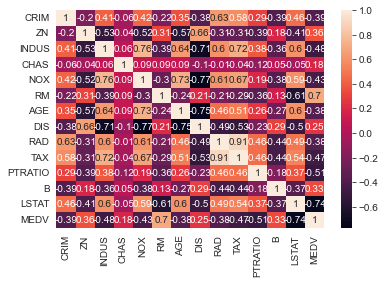

In [6]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

### We pick two input features 'LSTAT' and 'RM' to perform linear regression as they provide the best correlation with the output MEDV

In [3]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

### Splitting the dataset into test and train with an 70:30 split

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)

### Task 2: Linear Regression using gradient descent on Boston Dataset

In [203]:
def compute_gradient(x, y, w1, w2, b):
    m = x.shape[0]
    dj_dw1 = 0
    dj_dw2 = 0
    dj_db = 0

    for i in range(m):
        f_wb = w1 * x.iloc[i]['LSTAT'] + w2 * x.iloc[i]['RM'] + b
        dj_dw1_i = (f_wb - y.iloc[i]) * x.iloc[i]['LSTAT']
        dj_dw2_i = (f_wb - y.iloc[i]) * x.iloc[i]['RM']
        dj_db_i = f_wb - y.iloc[i]
        dj_db += dj_db_i
        dj_dw1 += dj_dw1_i
        dj_dw2 += dj_dw2_i
    dj_dw1 = dj_dw1 / m
    dj_dw2 = dj_dw2 / m
    dj_db = dj_db / m

    return dj_dw1, dj_dw2, dj_db

### Applied Gradient descent for two input features

In [204]:
def gradient_descent(x, y, num_iters, w1_in, w2_in, b_in, alpha, gradient_function, ):

    w1 = copy.deepcopy(w1_in) # avoid modifying global w_in
    w2 = copy.deepcopy(w2_in)

    b = b_in
    w1 = w1_in
    w2 = w2_in

    for i in range(num_iters):

        dj_dw1, dj_dw2, dj_db = gradient_function(x, y, w1 , w2, b)


        b = b - alpha * dj_db
        w1 = w1 - alpha * dj_dw1
        w2 = w2 - alpha * dj_dw2


    return w1, w2, b

In [206]:

w1_init = 0
w2_init = 0
b_init = 0

iterations = 1000
tmp_alpha = 1.0e-3

w1_final, w2_final, b_final = gradient_descent(X_train ,Y_train, iterations, w1_init, w2_init, b_init, tmp_alpha, compute_gradient)

### Checking the coeficients that our model generated, since we took two input labels we have two weights and a bias

In [207]:
print(f"(w1, w2, b) found by gradient descent: ({w1_final:.4f},{w2_final:.4f},{b_final:.4f})")

(w1, w2, b) found by gradient descent: (-0.6622,4.7939,0.6581)


In [208]:
y_actual = []
y_predicted = []
m = X_test.shape[0]

for i in range(m):
    y_actual.append(Y_test.iloc[i])
    temp = w1_final * X_test.iloc[i]['LSTAT'] + w2_final * X_test.iloc[i]['RM'] + b_final
    y_predicted.append(temp)

y_actual_train = []
y_predicted_train = []
m1 = X_train.shape[0]

for i in range(m1):
    y_actual_train.append(Y_train.iloc[i])
    temp1 = w1_final * X_train.iloc[i]['LSTAT'] + w2_final * X_train.iloc[i]['RM'] + b_final
    y_predicted_train.append(temp1)


### Comparing the RMSE values for our Leniar Regression model using GD on train and test set

In [210]:
MSE = np.square(np.subtract(y_actual,y_predicted)).mean()

RMSE = math.sqrt(MSE)
print("Root Mean Square Error for test:\n")
print(f"{RMSE}")

print("\n")

MSE_train = np.square(np.subtract(y_actual_train,y_predicted_train)).mean()

RMSE_train = math.sqrt(MSE_train)
print("Root Mean Square Error for train:\n")
print(f"{RMSE_train}")

Root Mean Square Error for test:

6.042667801289261


Root Mean Square Error for train:

5.291311248738841


### It is true that since our model is trained on the training set it would have a lower error value for the training data